# Importing Dataset and Assigning Columns

In [401]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ab1fee0f25804e008eab74f649a5bf23 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CBEvzqubzlmtMd2-soX6lwmZ11OQgfzvcpi47i6CuvAR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ab1fee0f25804e008eab74f649a5bf23.get_object(Bucket='dataanalysis-donotdelete-pr-pygkr2zsk2cfwa',Key='imports-85.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_car = pd.read_csv(body, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df_car.columns=headers
pd.set_option("max_columns", 26)
pd.set_option("max_rows", 205)
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Checking Column Datatypes

In [402]:
#check datatype
print(df_car.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


# Cleaning Data in Normalized-Losses column

In [403]:
#cleaning data
df_car["price"].replace("?", np.nan, inplace=True)
df_car.dropna(subset=["price"],axis=0, inplace=True)
df_car["price"]=df_car["price"].astype('int')

In [404]:
#replacing nan values to mean in normalized
df_car["normalized-losses"].replace("?", np.nan ,inplace=True)
df_car["normalized-losses"]=df_car["normalized-losses"].astype('float')
nl_mean=df_car["normalized-losses"].mean()
df_car["normalized-losses"].replace(np.nan, nl_mean, inplace=True)
df_car["normalized-losses"].head(10)

0     122.0
1     122.0
2     122.0
3     164.0
4     164.0
5     122.0
6     158.0
7     122.0
8     158.0
10    192.0
Name: normalized-losses, dtype: float64

# Counting and assigning null values to variable

In [405]:
df_car.replace("?", np.nan, inplace=True)

#count num of blanks in cols
no_data=df_car.isnull()

In [406]:
# checking null values in  dataset
for column in no_data.columns.values.tolist():
    print(column)
    print(no_data[column].value_counts())
    print('----------------------------------------------------')

symboling
False    201
Name: symboling, dtype: int64
----------------------------------------------------
normalized-losses
False    201
Name: normalized-losses, dtype: int64
----------------------------------------------------
make
False    201
Name: make, dtype: int64
----------------------------------------------------
fuel-type
False    201
Name: fuel-type, dtype: int64
----------------------------------------------------
aspiration
False    201
Name: aspiration, dtype: int64
----------------------------------------------------
num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64
----------------------------------------------------
body-style
False    201
Name: body-style, dtype: int64
----------------------------------------------------
drive-wheels
False    201
Name: drive-wheels, dtype: int64
----------------------------------------------------
engine-location
False    201
Name: engine-location, dtype: int64
----------------------------------------------------

# Assigning mean/mode values to nan data values

In [407]:
# peak-rpm, horsepower, stroke, bore, num-of-doors
df_car["peak-rpm"] = df_car["peak-rpm"].astype('float')
df_car["horsepower"] = df_car["horsepower"].astype('float')
df_car["stroke"] = df_car["stroke"].astype('float')
df_car["bore"] = df_car["bore"].astype('float')
mean_rpm= df_car["peak-rpm"].mean()
mean_hp = df_car["horsepower"].mean()
mean_str = df_car["stroke"].mean()
mean_bore = df_car["bore"].mean()
mean_num='four'

In [408]:
# replacing values with mean/mode
df_car["peak-rpm"].replace(np.nan, mean_rpm, inplace=True)
df_car["horsepower"].replace(np.nan, mean_hp, inplace=True)
df_car["stroke"].replace(np.nan, mean_str, inplace=True)
df_car["bore"].replace(np.nan, mean_bore, inplace=True)
df_car["num-of-doors"].replace(np.nan, mean_num, inplace=True)

# Formatting values to standard metric scale

In [409]:
# changing unit to l/100km
df_car["city-mpg"]=235/df_car["city-mpg"]
df_car.rename(columns={"city-mpg":"city-kmpl"}, inplace=True)
print(df_car["city-kmpl"].head(10))

0     11.190476
1     11.190476
2     12.368421
3      9.791667
4     13.055556
5     12.368421
6     12.368421
7     12.368421
8     13.823529
10    10.217391
Name: city-kmpl, dtype: float64


In [410]:
df_car["highway-mpg"]=235/df_car["highway-mpg"]
df_car.rename(columns={"highway-mpg":"highway-kmpl"}, inplace=True)
print(df_car["highway-kmpl"].head(10))

0      8.703704
1      8.703704
2      9.038462
3      7.833333
4     10.681818
5      9.400000
6      9.400000
7      9.400000
8     11.750000
10     8.103448
Name: highway-kmpl, dtype: float64


# Using Simple Feature Scaling for Data Normalization

In [411]:
#using simple feature scaling to normalize data values
df_car["length"] = df_car["length"]/df_car["length"].max()
df_car["width"] = df_car["width"]/df_car["width"].max()
df_car["height"] = df_car["height"]/df_car["height"].max()

# Plotting distribution of Horsepower

Text(0.5, 1.0, 'horsepower vs count')

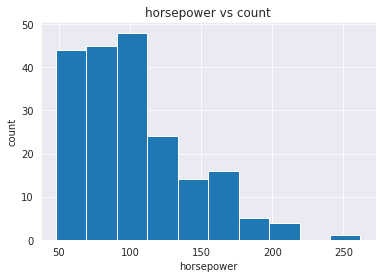

In [218]:
#plotting
plt.pyplot.hist(df_car["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower vs count")

# Creating Horsepower Bins

In [412]:
#binning
bins= np.linspace(min(df_car["horsepower"]), max(df_car["horsepower"]), 4)
print(bins)

[ 48.         119.33333333 190.66666667 262.        ]


In [413]:
gr_nm=["L", "M", "H"]
df_car["horsepower-bin"] = pd.cut(df_car["horsepower"], bins, labels=gr_nm, include_lowest=True)
print(df_car[["horsepower-bin","horsepower"]].head(10))

   horsepower-bin  horsepower
0               L       111.0
1               L       111.0
2               M       154.0
3               L       102.0
4               L       115.0
5               L       110.0
6               L       110.0
7               L       110.0
8               M       140.0
10              L       101.0


# Plot categorical HP

Text(0.5, 1.0, 'horsepower vs count')

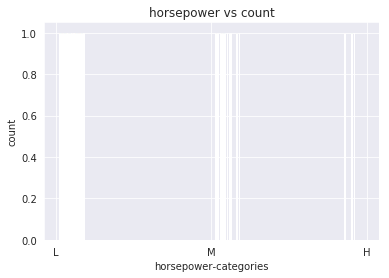

In [417]:
#plot categorical hist
plt.pyplot.hist(df_car["horsepower-bin"])
plt.pyplot.xlabel("horsepower-categories")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower vs count")

# Indicator Variable for Fuel type

In [222]:
dummyboi = pd.get_dummies(df_car["fuel-type"])
dummyboi.rename(columns={'gas':'fuel-gas', 'diesel': 'fuel-diesel'}, inplace=True)
print(dummyboi.head())

   fuel-diesel  fuel-gas
0            0         1
1            0         1
2            0         1
3            0         1
4            0         1


In [223]:
df_car = pd.concat([df_car, dummyboi], axis=1)
df_car.drop("fuel-type", axis=1, inplace=True)
print(df_car.head(10))

    symboling  normalized-losses         make aspiration num-of-doors  \
0           3              122.0  alfa-romero        std          two   
1           3              122.0  alfa-romero        std          two   
2           1              122.0  alfa-romero        std          two   
3           2              164.0         audi        std         four   
4           2              164.0         audi        std         four   
5           2              122.0         audi        std          two   
6           1              158.0         audi        std         four   
7           1              122.0         audi        std         four   
8           1              158.0         audi      turbo         four   
10          2              192.0          bmw        std          two   

     body-style drive-wheels engine-location  wheel-base    length     width  \
0   convertible          rwd           front        88.6  0.811148  0.890278   
1   convertible          rwd        

# Creating Indicator Variable for Aspiration

In [224]:
# indicator variable for aspiration
dummyboi2 = pd.get_dummies(df_car["aspiration"])
dummyboi2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

In [225]:
df_car = pd.concat([df_car, dummyboi2], axis=1)
df_car.drop("aspiration", axis=1, inplace=True)
df_car.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price,horsepower-bin,fuel-diesel,fuel-gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,...,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495,L,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,...,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500,L,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,...,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500,M,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,...,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950,L,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,...,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450,L,0,1,1,0


In [226]:
! pip install seaborn

# Exploratory Data Analysis 

In [227]:
import seaborn as sns
df_car.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-kmpl,highway-kmpl,price,fuel-diesel,fuel-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,0.554726,0.559197,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,0.036285,0.047199,0.082267,0.241033,-0.241033,-0.218190,0.218190


# Analyzing correlation between randomly selected variables

In [228]:
# between price and engine-size
df_car[["price","engine-size"]].corr()

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


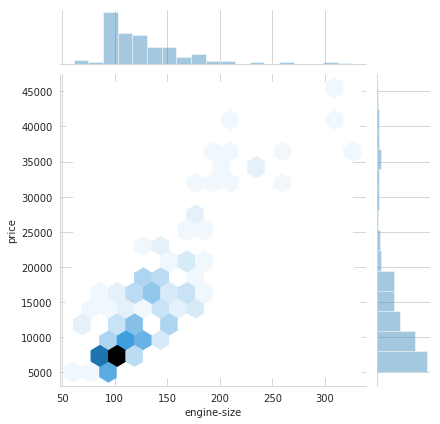

In [229]:
sns.set_style("whitegrid")
sns.jointplot(x=df_car['engine-size'], y=df_car['price'], data=df_car, kind="hex")

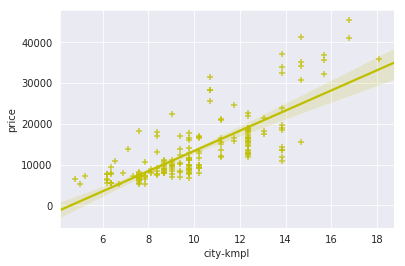

In [230]:
sns.set_style("darkgrid")
#between citykmpl and price
sns.regplot(x="city-kmpl", y="price", data=df_car, color="y", marker="+")

In [231]:
#between peak-rpm and price
df_car[["price", "peak-rpm"]].corr()

,price,peak-rpm
price,1.000000,-0.101542
peak-rpm,-0.101542,1.000000


In [232]:
#between stroke and price
df_car[["price","stroke"]].corr()

,price,stroke
price,1.000000,0.082267
stroke,0.082267,1.000000


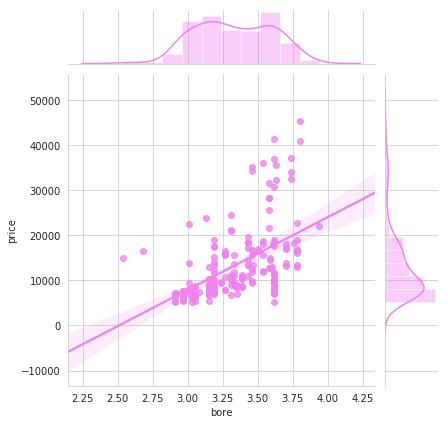

In [233]:
#visualization
sns.set_style("whitegrid")
sns.color_palette("RdBu", n_colors=7)
sns.jointplot(x=df_car['bore'], y=df_car['price'], data=df_car, kind="reg", color="violet")

# EDA for Categorical Variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

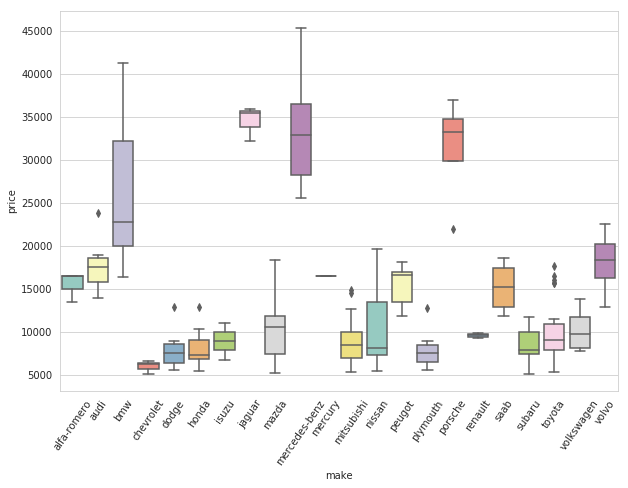

In [234]:
#car and price 
from matplotlib import *
import sys
import pylab as pl
pl.figure(figsize =(10,7))
sns.boxplot(x=df_car["make"],y=df_car["price"], palette="Set3", data=df_car)
pl.xticks(rotation=55)

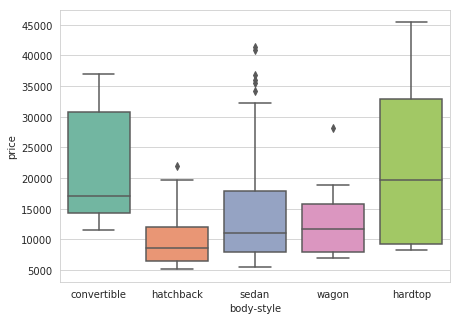

In [235]:
#between body-style and price
pl.figure(figsize=(7,5))
sns.boxplot(x="body-style", y="price", data=df_car, palette="Set2")

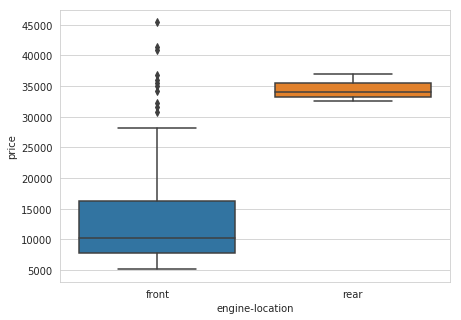

In [236]:
#between engine location and price
pl.figure(figsize=(7,5))
sns.boxplot(x="engine-location", y="price", data=df_car)

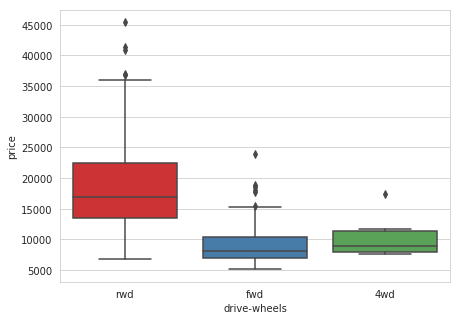

In [237]:
# between drive wheels and price
pl.figure(figsize=(7,5))
sns.boxplot(x="drive-wheels", y="price", data=df_car, palette="Set1")

<p> Here the more difference there is in the range among categories, the better the predictor variable will be.</p>

# Counting Values

In [238]:
drive_wheels_counts = df_car['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [239]:
engine_loc_counts = df_car['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


# Grouping Variables

In [240]:
df_grp1 = df_car[["body-style","drive-wheels","price"]]
df_g1 = df_grp1.groupby(['drive-wheels'],as_index=False).mean()
df_g1.head()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [241]:
df_g2 = df_grp1.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_g2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [242]:
piv1 = df_g2.pivot(index="drive-wheels", columns="body-style")
pv1=piv1.replace(np.nan, 0, inplace=True)
piv1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Plotting Pivot

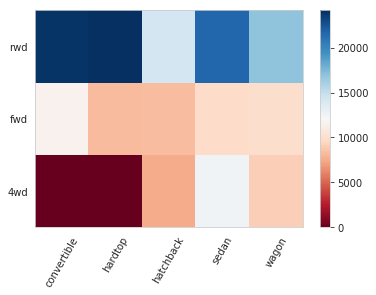

In [243]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.pcolor(piv1, cmap='RdBu')

#label names
row_labels = piv1.columns.levels[1]
col_labels = piv1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(piv1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(piv1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=60)

fig.colorbar(im)
plt.show()

# Using Stats library to employ statistical techniques

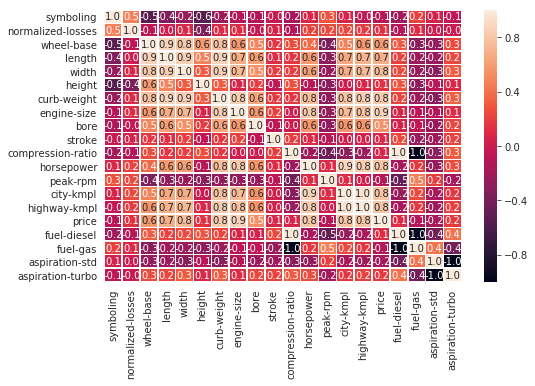

In [244]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_car.corr(), annot=True, linewidth='.5', fmt='.1f', ax=ax)

In [245]:
! pip install scipy

In [246]:
from scipy import stats
p_coef, p_val = stats.pearsonr(df_car['wheel-base'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.5846418222655081

8.076488270732955e-20


In [247]:
# price vs horsepower
p_coef, p_val = stats.pearsonr(df_car['horsepower'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.8096811975632284

6.058444649710872e-48


In [248]:
# price vs length
p_coef, p_val = stats.pearsonr(df_car['length'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.6906283804483642

8.016477466158713e-30


In [249]:
# price vs highway-kmpl
p_coef, p_val = stats.pearsonr(df_car['highway-kmpl'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.8011176263981975

3.0467845810412534e-46


In [250]:
# price vs compression-ratio
p_coef, p_val = stats.pearsonr(df_car['compression-ratio'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.07110732668194143

0.31581101887291624


In [251]:
# price vs width
p_coef, p_val = stats.pearsonr(df_car['width'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.7512653440522673

9.20033551048166e-38


In [252]:
# price vs height
p_coef, p_val = stats.pearsonr(df_car['height'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.1354863075680597

0.05514627325101211


In [253]:
# price vs normalized-losses
p_coef, p_val = stats.pearsonr(df_car['normalized-losses'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.13399873429274337

0.057897493527030296


In [254]:
# price vs engine-size
p_coef, p_val = stats.pearsonr(df_car['engine-size'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.8723351674455185

9.265491622197996e-64


In [350]:
#price vs city-kmpl
p_coef, p_val = stats.pearsonr(df_car['city-kmpl'], df_car['price'])
print(p_coef)
print()
print(p_val)

0.7898975136626942

3.9031064009399405e-44


<p>If p > 0.1, corr is not significant</p>
<p>If p $<$ 0.1, corr might be significant </p>
<p>If p $<$ 0.05, corr is moderately significant</p>
<p>If p $<$ 0.001, corr is strongly significant</p>    <p> The closer the pearson coeff to 1, the stronger the correlation is</p>

# ANOVA

In [255]:
df_g3 = df_car[["drive-wheels","price"]].groupby(['drive-wheels'])
f_val, p_val = stats.f_oneway(df_g3.get_group('fwd')['price'], df_g3.get_group('rwd')['price'], df_g3.get_group('4wd')['price'])
print('F-value:', f_val, 'P-value:', p_val)

F-value: 67.95406500780399 P-value: 3.3945443577151245e-23


# Model Development with Regression

In [256]:
# Good stuff now
from sklearn.linear_model import LinearRegression

In [257]:
# create Linear Regression Model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [258]:
# # Assigning regressor and regressed variable
X= df_car[['city-kmpl']]
Y= df_car[['price']]
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
Y_h = lm.predict(X)
print(Y_h[0:7])

[[16293.8802044 ]
 [16293.8802044 ]
 [19211.26183196]
 [12829.48952166]
 [20913.06778137]
 [19211.26183196]
 [19211.26183196]]


In [260]:
# Printing values of Intercept and coeff
print('lm_coeff= ', lm.coef_)
print('lm_intercept= ', lm.intercept_)

lm_coeff=  [[2476.67078595]]
lm_intercept=  [-11421.24525746]


<b>price</b> = -11421.25 + 2476.67 x  <b>city-kmpl</b>

In [261]:
# between engine and price
lm1=LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
lm1.fit(df_car[['engine-size']], df_car[['price']])
Yh1 = lm.predict(df_car[['engine-size']])
Yh1[0:7]

array([[310545.95691639],
       [310545.95691639],
       [365032.71420735],
       [258535.87041138],
       [325405.98163211],
       [325405.98163211],
       [325405.98163211]])

In [263]:
# getting equation
print('lm_coeff= ', lm1.coef_)
print('lm_intercept= ', lm1.intercept_)

lm_coeff=  [[166.86001569]]
lm_intercept=  [-7963.33890628]


<b>price</b> = -7963.34 + 166.86 x  <b>engine-size</b>

In [264]:
# horsepower and price 
lm1.fit(df_car[['horsepower']], df_car[['price']])
Yh2=lm.predict(df_car[['horsepower']])
Yh2[0:7]

array([[263489.21198329],
       [263489.21198329],
       [369986.05577925],
       [241199.17490972],
       [273395.8951271 ],
       [261012.54119734],
       [261012.54119734]])

In [265]:
# get eqn
print('lm_coeff= ', lm1.coef_)
print('lm_intercept= ', lm1.intercept_)

lm_coeff=  [[172.20625117]]
lm_intercept=  [-4598.47780324]


<b>price</b> = 172.21 - 4598.48 x  <b>horsepower</b>

# Proceeding with Multiple Linear Regression

In [266]:
# MLR
x = df_car[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl', 'city-kmpl']]
y = df_car[['price']]

In [267]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [268]:
# get eqn
print('lm_coeff= ', lm.coef_)
print('lm_intercept= ', lm.intercept_)

lm_coeff=  [[  12.8891593     3.57096254   94.83866865 -485.28979502  914.77192701]]
lm_intercept=  [-14476.96552194]


<b>Price</b> = -14476.97 + 12.89 x <b>horsepower</b> + 3.57 x <b>curb-weight</b> + 94.84 x <b>engine-size</b> -485.29 x <b>highway-kmpl</b> + 914.77 x <b>city-kmpl</b>

In [269]:
# another model using highway kmpl and normalized-losses
z=df_car[['normalized-losses','highway-kmpl']]
lm.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [270]:
# get eqn
print('lm_coeff= ', lm.coef_)
print('lm_intercept= ', lm.intercept_)

lm_coeff=  [[-2.86467994e+00  3.46770737e+03]]
lm_intercept=  [-14340.93576227]


<b>Price</b> = -14340.94 - 2.86 x <b>normalized-losses</b> + 3467.71 x <b>highway-kmpl</b>

# Model Evaluation using Visualization

(0, 49773.92477844911)

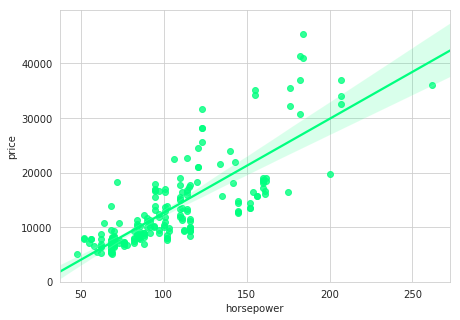

In [271]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))
sns.regplot(x="horsepower", y="price", data=df_car, color="springgreen")
plt.ylim(0,)

(0, 47414.112141280355)

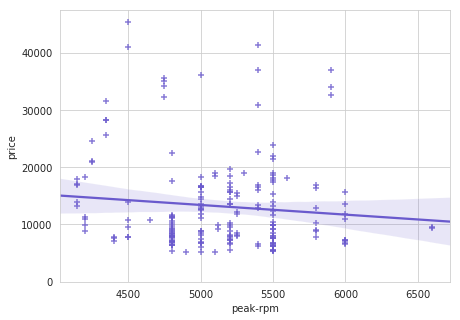

In [272]:
# regression between peak and price
plt.figure(figsize=(7, 5))
sns.regplot(x="peak-rpm", y="price", data=df_car, color="slateblue", marker="+")
plt.ylim(0,)

# Plotting Residual plots to analyze error margin

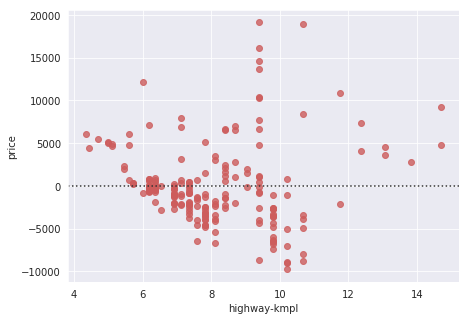

In [273]:
sns.set_style("darkgrid")
plt.figure(figsize=(7, 5))
sns.residplot(df_car['highway-kmpl'], df_car['price'], color="indianred")
plt.show()

<p>Since the graph has a bit of a curvture, a non linear model will be more appropriate.</p>

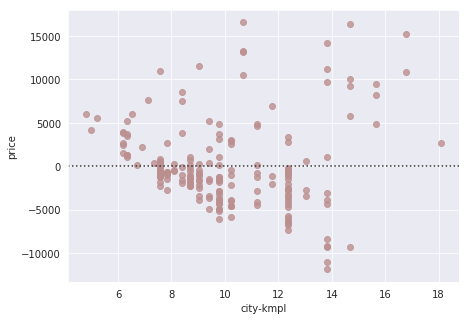

In [274]:
# between city-kmpl and price
plt.figure(figsize=(7, 5))
sns.residplot(df_car['city-kmpl'], df_car['price'], color="rosybrown")
plt.show()

# Visualizing MLR

In [275]:
def plotMLR(x,y):
    ax1 = sns.distplot(x, hist=False, color="salmon", label="Actual Value")
    sns.distplot(y, hist=False, color="turquoise", label="Predicted Values" , ax=ax1)


    plt.title('Actual vs Predicted Values for Price')
    plt.xlabel('Price')
    plt.ylabel('Property of Cars')

    plt.show()
    plt.close()

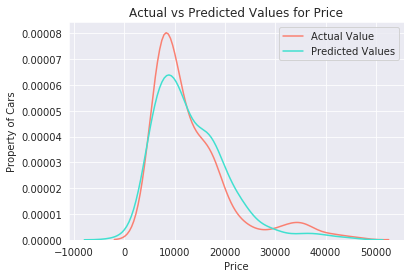

In [276]:
z=df_car[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl', 'city-kmpl']]
lm.fit(z,df_car[['price']])
yhat=lm.predict(z)
plotMLR(df_car[['price']],yhat)

# Polynomial Regression and Pipelines

In [337]:
def PlotPolly(model, iv, dv, nm):
    x_new = np.linspace(50, 275, 50)
    y_new = model(x_new)
    plt.figure(figsize=(7, 5))
    plt.plot(iv, dv, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(nm)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [344]:
# price and city-kmpl
x=df_car['horsepower']
y=df_car['price']
poly= np.polyfit(x,y,8)
p= np.poly1d(poly)
p

poly1d([ 3.62151812e-11, -3.77930653e-08,  1.65069970e-05, -3.93626567e-03,
        5.60111236e-01, -4.87189631e+01,  2.53495639e+03, -7.23073880e+04,
        8.74182054e+05])

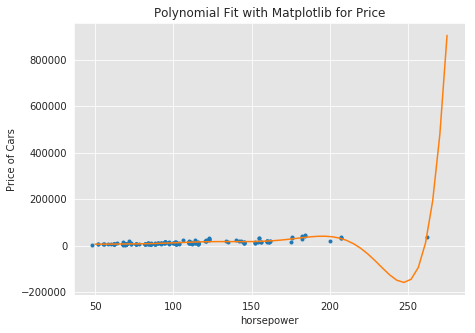

In [345]:
# plotting
PlotPolly(p, x, y, 'horsepower')

# Polynomial Transform

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [280]:
from sklearn.preprocessing import PolynomialFeatures
# create object
pr=PolynomialFeatures(degree=2)

In [281]:
pr_fit = pr.fit_transform(z)

In [282]:
z.shape

(201, 5)

In [283]:
# features after polynomial transforation
pr_fit.shape

(201, 21)

After polynomial transformation, we have 21 features from the initial 5

# Pipelines

In [284]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# creating a list of tuples including name, model etc
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [285]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [286]:
# normalizing, fitting and transforming
pipe.fit(z,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [387]:
pipe1=pipe.predict(z)
pipe1[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13069.09013582, 13069.09013582, 19981.2512624 ,  9805.9360063 ,
       17974.0647159 ])

# In Sample Evaluation

<b>R-squared values are best around 1</b>

In [288]:
# For SLR
# R square
x=df_car[['engine-size']]
lm.fit(x,y)
print('The R-square value is:', lm.score(x,y))

The R-square value is: 0.7609686443622008


In [289]:
# MSE
from sklearn.metrics import mean_squared_error
y_h=lm.predict(x)
mse_lm = mean_squared_error(y,y_h) 
print('Mean square error is:', mse_lm)

Mean square error is: 15021126.02517414


In [290]:
# For MLR
lm.fit(z,y)
print('The R-square value is:', lm.score(z,y))

The R-square value is: 0.8159421154569269


In [291]:
yh1=lm.predict(z)
mse_mr = mean_squared_error(y,yh1)
print('Mean square error is:', mse_mr)

Mean square error is: 11566502.111287236


In [292]:
# For PR
from sklearn.metrics import r2_score
x = df_car['engine-size']
y = df_car['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
r_sq = r2_score(y, p(x))
print('The R-square Value is:', r_sq)

The R-square Value is: 0.790151993157433


In [293]:
mse_pr = mean_squared_error(y, p(x))
print('Mean square error is:', mse_pr)

Mean square error is: 13187196.083555743


From these sample evaluations we can see that MLR is best suited for the data at hand.

# Model Evaluation

In [294]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [307]:
def DistributionPlot(Red, Blue, RedName, BlueName, Title):
    plt.figure(figsize=(7,5))

    ax1 = sns.distplot(Red, hist=False, color="lightsalmon", label=RedName)
    ax2 = sns.distplot(Blue, hist=False, color="magenta", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

# Polynomial Regression Plot for training and testing the model

In [296]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(7, 5)) 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [297]:
# assigning x and y
y=df_car['price']
x=df_car.drop('price', axis=1)

In [298]:
#dividing data to training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


<p>Here we take 85% of the data as training set</p>

In [299]:
# dividing another set of data into tr and test
x_tr1, x_tst1, y_tr1, y_tst1 = train_test_split(x, y, test_size=0.1, random_state=0)
print('Second set test sample', x_tst1.shape[0])
print('Second set train sample', x_tr1.shape[0])

Second set test sample 21
Second set train sample 180


<p>Here we take 60% of the data as training set</p>

In [300]:
# checking R squared value for test and train datasets
lr=LinearRegression()
lr.fit(x_train[['horsepower']], y_train)
print('The R-squared value for training model: ',lr.score(x_train[['horsepower']], y_train))
print('The R-squared value for testing model: ',lr.score(x_test[['horsepower']], y_test))

The R-squared value for training model:  0.6451479282728708
The R-squared value for testing model:  0.7077153381633062


In [301]:
# checking r value for the second set of test and training
lr.fit(x_tr1[['horsepower']], y_tr1)
print('The R-squared value for training model: ',lr.score(x_tr1[['horsepower']], y_tr1))
print('The R-squared value for testing model: ',lr.score(x_tst1[['horsepower']], y_tst1))

The R-squared value for training model:  0.648168763389971
The R-squared value for testing model:  0.7340593365410621


# Cross Validation

In [302]:
from sklearn.model_selection import cross_val_score
xcross=cross_val_score(lr, x[['horsepower']], y, cv=4)
xcross

array([0.7747254 , 0.51722436, 0.74881624, 0.04792707])

In [303]:
#calculating mean squared error
-1* cross_val_score(lr, x[['horsepower']], y, cv=4, scoring='neg_mean_squared_error')

array([20244958.23821453, 43740285.03051738, 12491753.70789968,
       17570582.82435501])

In [304]:
from sklearn.model_selection import cross_val_predict
yhat5 = cross_val_predict(lr, x[['horsepower']], y, cv=4)
yhat5[0:4]

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ])

# Model Selection

In [346]:
# mlr for training set
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']])
yhat_train[0:5]

array([12076.77719418, 11552.09300473,  6528.83584428, 21695.14271757,
       16212.13570053])

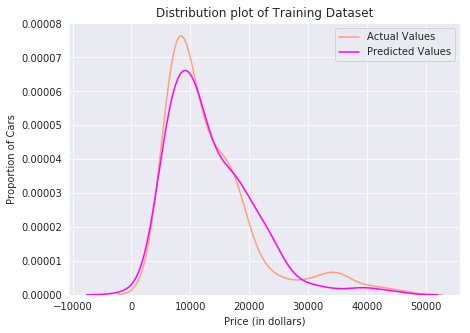

In [347]:
DistributionPlot(y_train, yhat_train, "Actual Values", "Predicted Values", "Distribution plot of Training Dataset")

In [348]:
# mlr for test dataset
lr.fit(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y_test)
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']])
yhat_test[0:5]

array([10015.14865726,  5462.47731781, 11318.84971966,  6313.7658941 ,
       14001.06696015])

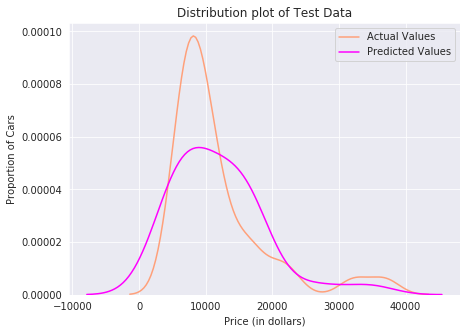

In [349]:
# distplot for test dataset
DistributionPlot(y_test, yhat_test, "Actual Values", "Predicted Values", "Distribution plot of Test Data")

Here we can see that, the test data underfits the actual values

# Training the Data Set

In [356]:
# we take 55% data for training the dataset
x=df_car.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_trainp = pr.fit_transform(x_train[['horsepower']])
x_testp = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [358]:
p = LinearRegression()
p.fit(x_trainp, y_train)
yh6 = p.predict(x_testp)
yh6[0:5]

array([ 6724.76116109,  7303.49864165, 12213.80183416, 18899.20701982,
       19999.01946404])

In [360]:
print('predicted values:',yh6[0:5])
print('actual values:',y_test[0:5].values)

predicted values: [ 6724.76116109  7303.49864165 12213.80183416 18899.20701982
 19999.01946404]
actual values: [ 6295 10698 13860 13499 15750]


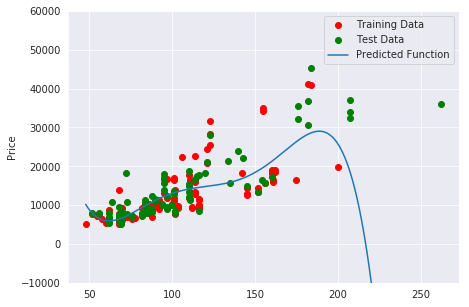

In [361]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, p,pr)

In [363]:
# calculate r squared value
p.score(x_trainp, y_train)

0.5570463603803888

In [364]:
#calculate r squared for test
p.score(x_testp, y_test)

-29.69490044538257

We can see that the value of R^2 is not impressive. Negative value is a sign of overfitting.
Let us perform some analysis to see which degree fits the polynomial regression model best.

Text(3, 0.75, 'Maximum R^2 ')

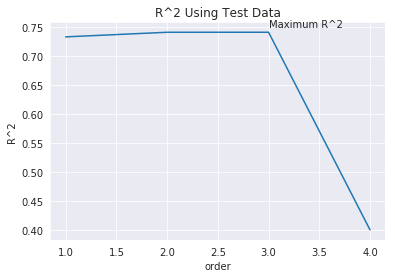

In [368]:
# if we decrease degree overfitting will reduce
Rsq_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_trainp = pr.fit_transform(x_train[['horsepower']])
    
    x_testp = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_trainp, y_train)
    
    Rsq_test.append(lr.score(x_testp, y_test))

plt.plot(order, Rsq_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

Here we see that the plot gives best Rsq value when degree is 3

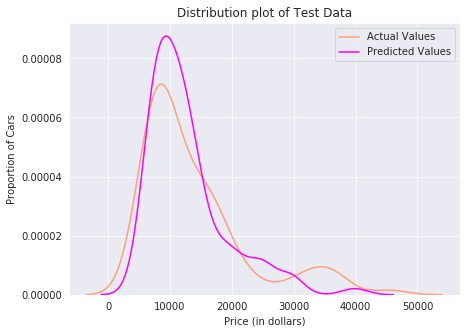

In [396]:
pr = PolynomialFeatures(degree=3)
x_trainp = pr.fit_transform(x_train[['horsepower']])
x_testp = pr.fit_transform(x_test[['horsepower']])    
lr.fit(x_trainp, y_train)
yhat = lr.predict(x_testp)
DistributionPlot(y_test, yhat, "Actual Values", "Predicted Values", "Distribution plot of Test Data")

In [397]:
lr.score(x_testp, y_test)

0.740631230401003

We see that after training the model and changing the degree to three. We have a better model.

In [371]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

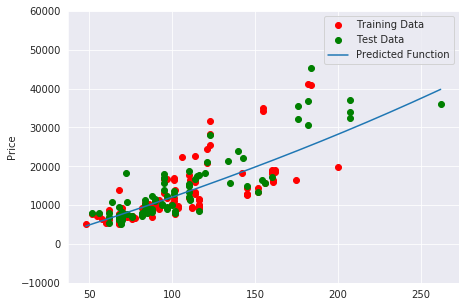

<function __main__.f(order, test_data)>

In [380]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

# Ridge Regresssion

In [392]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl','normalized-losses','symboling']])

In [393]:
from sklearn.linear_model import Ridge
ridreg=Ridge(alpha=0.1)
ridreg.fit(x_train_pr, y_train)
yhat=ridreg.predict(x_train_pr)
print('Predicted Values:',yhat[0:5])
print('Atual Values:', y_train[0:5].values)

Predicted Values: [13041.47664753 17629.86441866  6378.5402934  19091.08684653
  8575.25534397]
Atual Values: [16925 18420  5389 19045  7775]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.02747e-16): result may not be accurate.
  overwrite_a=True).T


In [391]:
Rsq_test = []
Rsq_train = []
dummy1 = []
alph = 10 * np.array(range(0,1000))
for alfa in alph:
    rm = Ridge(alpha=alfa) 
    rm.fit(x_train_pr, y_train)
    Rsq_test.append(rm.score(x_test_pr, y_test))
    Rsq_train.append(rm.score(x_train_pr, y_train))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.63196e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.34408e-22): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.29818e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.76271e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.23314e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.96955e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.01341e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.05701e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.10064e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.1443e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.87073e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.91555e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.96037e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.00522e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.05007e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.73795e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.77531e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.81267e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.85005e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.88744e-20): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.60472e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.60848e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61224e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61599e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61975e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.92832e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.93202e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.93571e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.93937e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.94303e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.22898e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.23265e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.23632e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.23999e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.24366e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.54892e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.55261e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.5563e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.55998e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.56367e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.86286e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.86656e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.87026e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.87396e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.87766e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.15954e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.16325e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.16697e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.17069e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.1744e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.47602e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.47975e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.48348e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.48721e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.49094e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.74132e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.74506e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.74881e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.75255e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.7563e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/

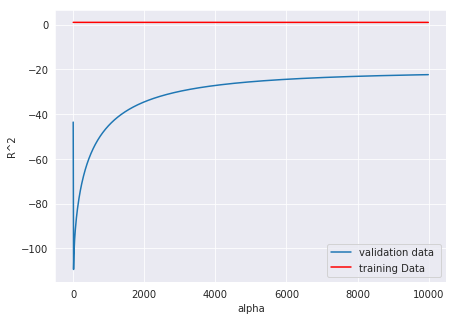

In [394]:
# plotting values
plt.figure(figsize=(7, 5))

plt.plot(alph,Rsq_test, label='validation data ')
plt.plot(alph,Rsq_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

# Grid search for getting best hyperparamter

In [381]:
from sklearn.model_selection import GridSearchCV
params= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
params

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [382]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [384]:
# using grid search for best alpha
Grid1 = GridSearchCV(RR, params,cv=4)
Grid1.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y)
BestRR=Grid1.best_estimator_
BestRR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [386]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-kmpl']], y_test)

0.8411809773803186

This concludes the project, we have analyzed the dataset and used Ridge Regression to maximise R-squared and make a fit model for the dataset.